In [1]:
import pandas as pd # data frame library
import numpy as np # scientific computing library
from plotnine import * # plotting library

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Regression Line

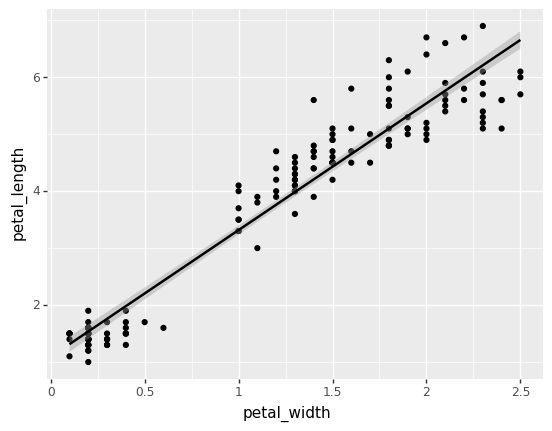

<ggplot: (308682901)>

In [3]:
# petal_width vs petal_length
ggplot(iris,aes(x="petal_width",y="petal_length"))+geom_point()+geom_smooth(method="lm")

## Facet Wrap
* allows to create subplots around a categorical attribute

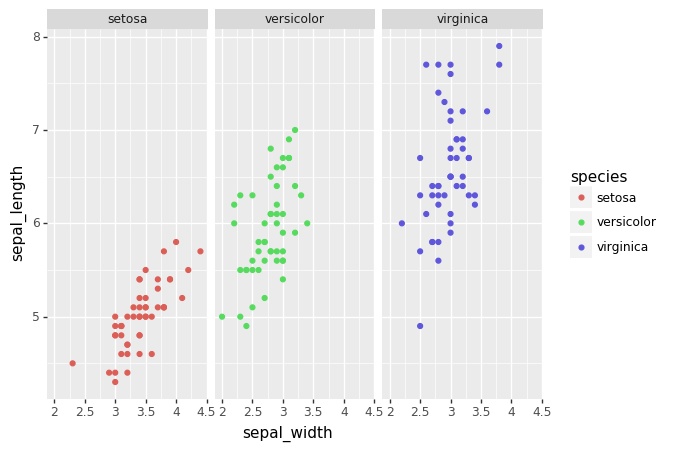

<ggplot: (310859405)>

In [4]:
# sepal_width vs sepal_length, col = species
ggplot(iris,aes(x="sepal_width",y="sepal_length",color="species"))+geom_point()+facet_wrap("species")

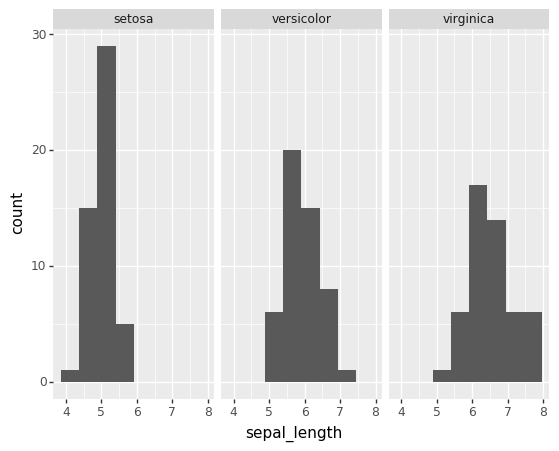

<ggplot: (311074757)>

In [5]:
# sepal length, histogram
ggplot(iris,aes(x="sepal_length"))+geom_histogram()+facet_wrap("species")

## More Visualization Properties:

### Shape

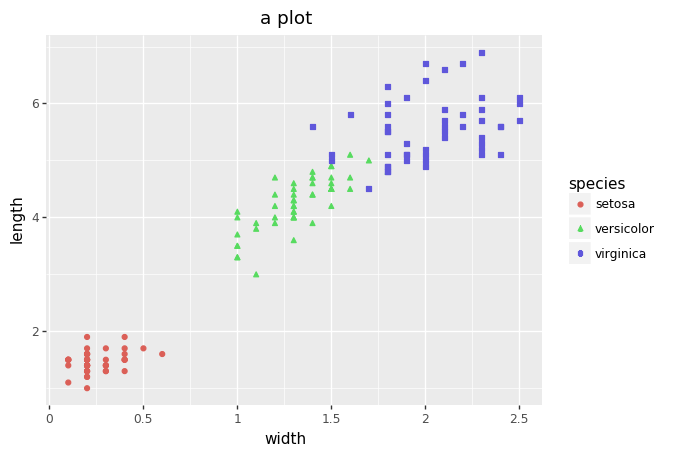

<ggplot: (311256021)>

In [6]:
# petal_width vs petal_length, col=species
(
    ggplot(iris,aes(x="petal_width",y="petal_length",color="species",shape="species"))
    +geom_point()
    +labs(title="a plot",x="width",y="length")
)

### Multi-line Function Statement

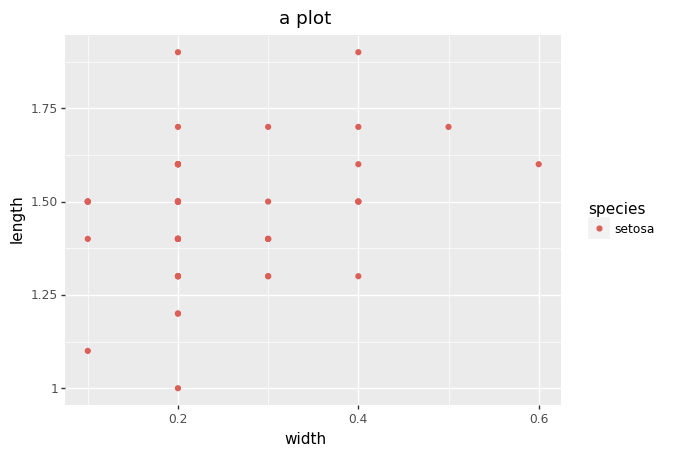

<ggplot: (311391537)>

In [7]:
# petal_length vs petal_width, shape=color=species, labs(x,y,title)
(
    ggplot(iris.loc[iris["species"]=="setosa"],aes(x="petal_width",y="petal_length",color="species",shape="species"))
    +geom_point()
    +labs(title="a plot",x="width",y="length")
)

### Dynamic Subset Data

In [13]:
# previous, only show setosa

### Themes

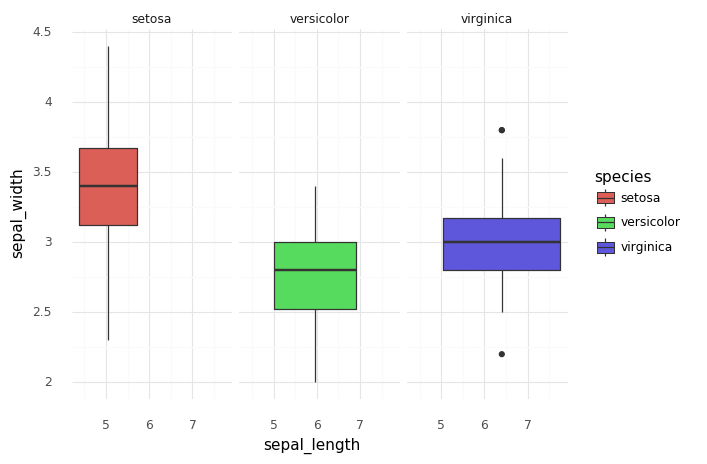

<ggplot: (311303773)>

In [9]:
# sepal_length vs sepal_width, fill=facet_wrap=species, boxplot 
(
    ggplot(iris,aes(x="sepal_length",y="sepal_width",fill="species"))
    +geom_boxplot()
    +facet_wrap("species")
    +theme_minimal()
)

### Factored Attributes

In [11]:
titanic = pd.read_csv("titanic.csv")

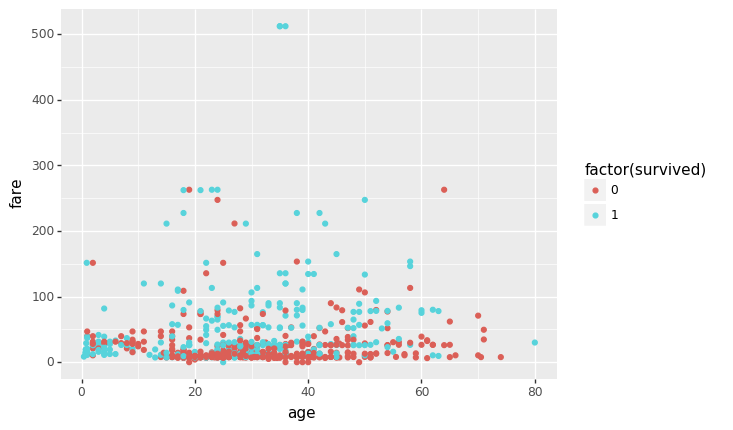

<ggplot: (311934925)>

In [12]:
# fare vs age, col=survived, point
ggplot(titanic,aes(x='age',y='fare',color='factor(survived)'))+geom_point()

## Missing Values

In [43]:
iris_missing = pd.read_csv("iris-missing.csv")

In [44]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
iris_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    135 non-null float64
sepal_width     144 non-null float64
petal_length    143 non-null float64
petal_width     142 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Break into groups of 2 and conduct an exploratory data analysis on the iris-missing data.

#### Remember to use the info and describe functions to see what the data looks like.
#### You can plot numerical and categorical attributes to visualize relationships
#### Ultimately, I want to know:
* what species the missing values belong to
* how do the missing values affect the distribution of the data (mean, standard deviation, skewness)
* how will missing values affect any algorithm I apply on the data
* how to decide whether to remove rows that have any missing values or to impute new values
* what value to use to fill in the missing data

In [19]:
(
    missing_data = iris_missing.loc[iris_missing['sepal_length'].isnull() | 
    iris_missing['sepal_width'].isnull() | 
    iris_missing['petal_length'].isnull() |
    iris_missing['petal_width'].isnull()]
)

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,NaN,setosa
4,5.0,3.6,1.4,NaN,setosa
7,NaN,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,NaN,setosa
12,4.8,3.0,1.4,NaN,setosa
18,NaN,3.8,1.7,0.3,setosa
21,5.1,3.7,1.5,NaN,setosa
28,NaN,3.4,1.4,NaN,setosa
39,NaN,3.4,1.5,NaN,setosa
46,NaN,3.8,1.6,0.2,setosa


In [21]:
iris_missing.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,135.000000,144.000000,143.000000,142.000000
mean,5.826667,3.063194,3.726573,1.254225
std,0.820557,0.437850,1.798667,0.746208
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.400000
50%,5.800000,3.000000,4.300000,1.400000
75%,6.400000,3.325000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


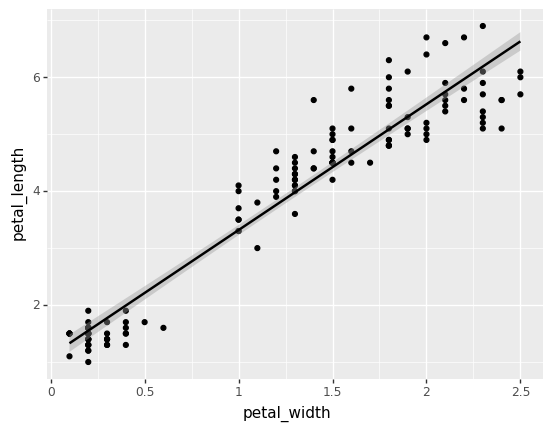

<ggplot: (312038341)>

In [27]:
ggplot(iris_missing,aes(x="petal_width",y="petal_length"))+geom_point()+geom_smooth(method="lm")

In [39]:
mean_iris = iris_missing.groupby(['species'])[['petal_length','petal_width','sepal_length','sepal_width']].mean().reset_index()
mean_iris

,species,petal_length,petal_width,sepal_length,sepal_width
0,setosa,1.464000,0.250,4.982222,3.418000
1,versicolor,4.234884,1.326,5.955556,2.770000
2,virginica,5.552000,2.026,6.542222,2.993182


iris.mean()

In [41]:
iris_missing.mean()

sepal_length    5.826667
sepal_width     3.063194
petal_length    3.726573
petal_width     1.254225
dtype: float64

In [42]:
iris_missing = iris_missing.dropna()

In [46]:
petal_length_avg = iris_missing["petal_length"].mean()
petal_length_avg

3.7265734265734265

In [47]:
iris_missing['petal_length'].fillna(petal_length_avg,inplace=True)

In [49]:
iris_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    135 non-null float64
sepal_width     144 non-null float64
petal_length    150 non-null float64
petal_width     142 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
iris_missing['sepal_length'].mean()

5.826666666666666

In [67]:
means = iris_missing.groupby(['species'])[['sepal_length']].mean().reset_index()

In [68]:
means

,species,sepal_length
0,setosa,4.982222
1,versicolor,5.955556
2,virginica,6.542222


In [70]:
iris_missing.loc[iris_missing['species']=='setosa','sepal_length']=means[0]
iris_missing.loc[iris_missing['species']=='versicolor','sepal_length']
iris_missing.loc[iris_missing['species']=='virginica','sepal_length']

KeyError: 0